In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import skimage
import math

In [59]:
def show_img(array: np.ndarray):
    plt.axis('off')
    plt.imshow(array)
    plt.show()

/var/folders/wm/4tmm8v6n6j7d8s6tdbkm95b80000gn/T/ipykernel_54756/1053819002.py:6: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (391, 293, 3) looks like that of an RGB image.
  threshold = threshold_otsu(tumor) + 105


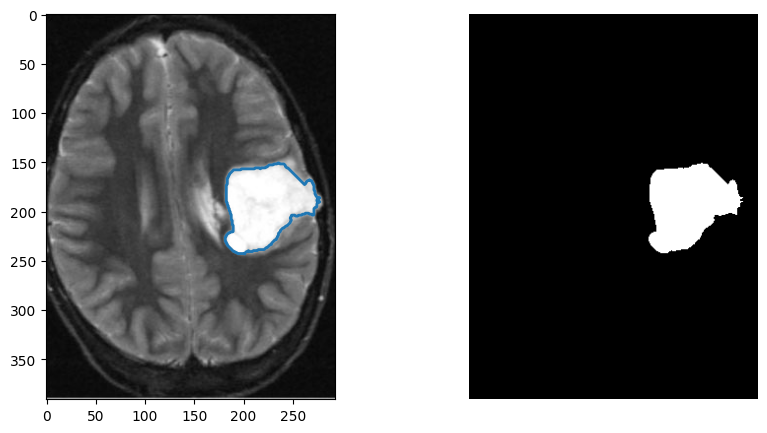

In [93]:
from skimage.filters import threshold_otsu

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

tumor = cv2.imread('brain_tumor.png')
threshold = threshold_otsu(tumor) + 105
seed = np.copy(tumor)
seed[1:-1, 1:-1] = tumor.max()

rec = skimage.morphology.reconstruction(seed, tumor, method='erosion')

binary = rec[:, :, 0] > threshold
binary = skimage.morphology.remove_small_objects(binary, min_size=400, connectivity=2)

# find contours from mask and draw it on the original image
contours = skimage.measure.find_contours(binary, 0.5)
for contour in contours:
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.axis('off')
ax1.imshow(tumor)
ax2.imshow(binary, cmap='gray')

Airbus shape: (394, 550, 3)
Average red: 215.78712609970674, average green: 222.38348973607037, average blue: 239.19020527859237
Average norm: 391.4466178149695
Max distance: 365.9515202470056


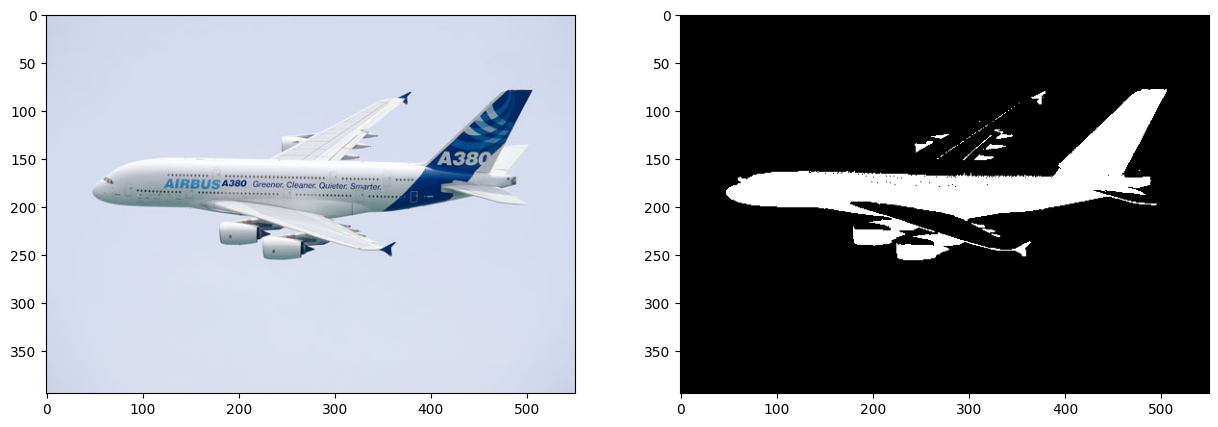

In [89]:
airbus = cv2.imread('data/airbus.png')
airbus = cv2.cvtColor(airbus, cv2.COLOR_BGR2RGB)
print(f'Airbus shape: {airbus.shape}')

width, height, _ = airbus.shape
sky = airbus[270:height, :, :]

avg_red, avg_green, avg_blue = np.mean(sky[:, :, 0]), np.mean(sky[:, :, 1]), np.mean(sky[:, :, 2])
print(f'Average red: {avg_red}, average green: {avg_green}, average blue: {avg_blue}')

#calculate normalized value or rgb colors in every pixel
norm = np.linalg.norm(airbus, axis=2)
avg_norm = np.linalg.norm(np.array([avg_red, avg_green, avg_blue]), axis=0)
print(f'Average norm: {avg_norm}')

distances = avg_norm - norm
max_distance = np.max(distances)
print(f'Max distance: {max_distance}')

outline = np.zeros(airbus.shape)
outline = np.where(norm >= max_distance, 0, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

ax1.imshow(airbus)
ax2.imshow(outline, cmap='gray')
